<a href="https://colab.research.google.com/github/bhavya-v-sudo/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import math

%matplotlib inline

# Ignore  the warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from sklearn.metrics import mean_squared_error

### **Data Set Overview**

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Load the data**

In [ ]:
# Read the data
renting_df = pd.read_csv('/content/drive/MyDrive/capstone_project-2/SeoulBikeData.csv', encoding='latin')

**First Five Observations**

In [ ]:
renting_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Last five observations**

In [ ]:
renting_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


**Shape of the Data**

In [ ]:
renting_df.shape

(8760, 14)

The provided data consists of over 8760 observations with 14 column variables.

**Feature Data Types**

In [ ]:
renting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Data consists of 14 columns variables and 10 of them are Numeric Columns.

In [ ]:
# Feature Statistics Summary
# Provides the statistical details for each column.
renting_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


* The target column Rented Bike Count per hour, ranges between 0 and 3556 over the 1 year span.

* Mean of Rented Bike Count = 704.6, with median and 75% percentile = 504.5 and 1065.25, respectively. This suggests that the 'Rented Bike Count' distribution is more denser at lower values. This is expected as out of 24 hours, we would expect the bike demand/usage to be high for maximum of maybe 6 hours or so.

Hence, we shall expect a strong correlation with hour column.

**Data Cleaning**

In [ ]:
# For missing data
renting_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset provided seems to be a very clean set of data and there are no missing data.

Replacing spaces in the columns with underscore(_).

In [ ]:
#function to replace spaces with underscore and ignoring special characters.
def get_underscore_for_space_list(list_of_strings):
  for i in range(len(list_of_strings)):
    if "(" in list_of_strings[i]:
      list_of_strings[i] = list_of_strings[i].split('(')[0]
    list_of_strings[i] = '_'.join(list_of_strings[i].split())
    if "_" in list_of_strings[i][-1]:
      list_of_strings[i] = list_of_strings[i][:-1]
  return list_of_strings


renting_df.columns = get_underscore_for_space_list(list(renting_df.columns))

In [ ]:
renting_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### **Exploratory Data Analysis**

**Target Variable:**

In [ ]:
# make a copy DF
renting_df1 = renting_df.copy()

Text(0.5, 1.0, 'Rented Bike Count')

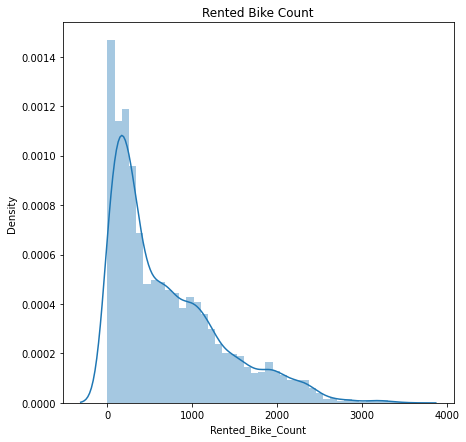

In [ ]:
# target value has Rented_Bike_Count values
target_value = renting_df1['Rented_Bike_Count']
plt.figure(figsize=(7,7))
# plot for Rented Bike Count.
sns.distplot(renting_df1['Rented_Bike_Count'])
plt.title('Rented Bike Count')

**Numerical Feature:**

In [ ]:
# make numeric_feature variable.
numeric_features = [i for i in renting_df1.describe().columns if i not in ['Rented_Bike_Count']]
numeric_features

['Hour',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

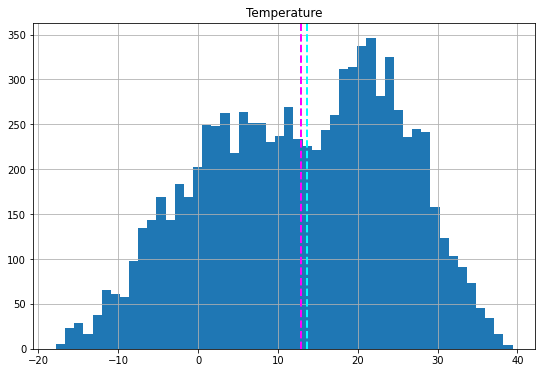

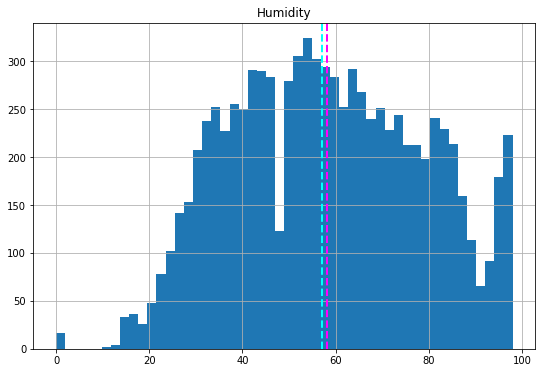

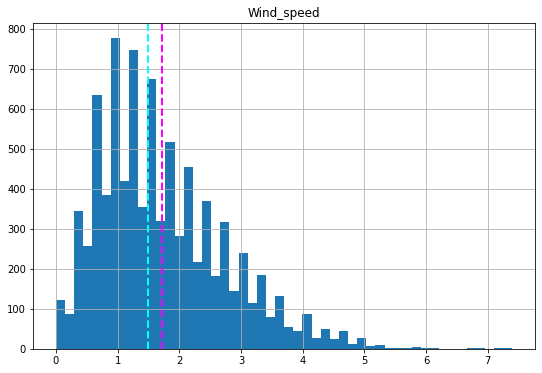

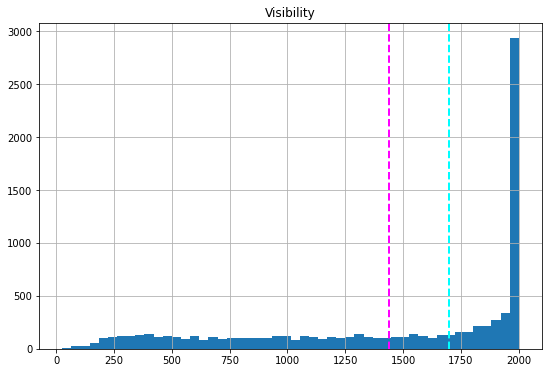

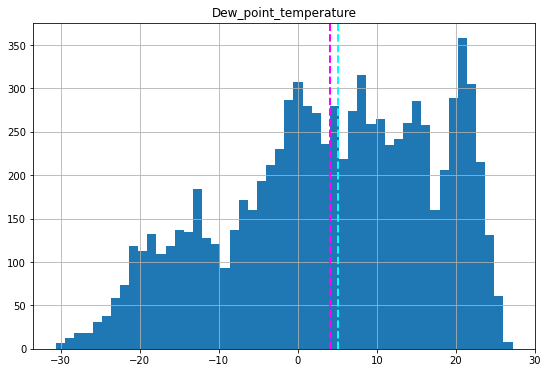

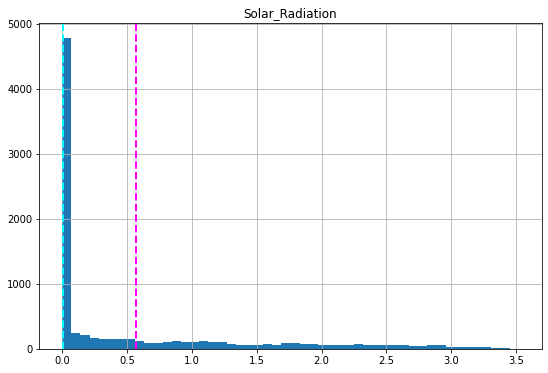

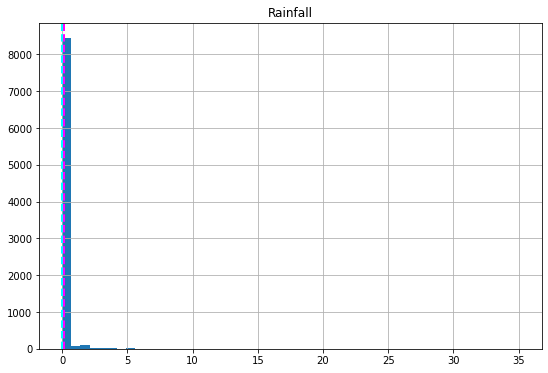

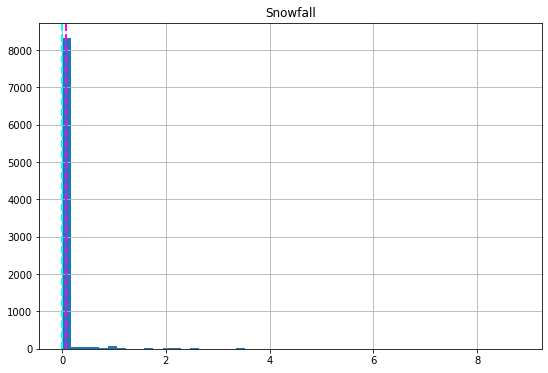

In [ ]:
# plot a bar plot for each numerical feature count except for Hour

for col in [i for i in numeric_features if i not in ['Hour']]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = renting_df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)

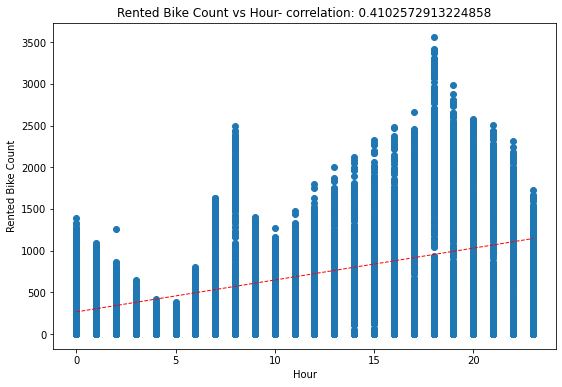

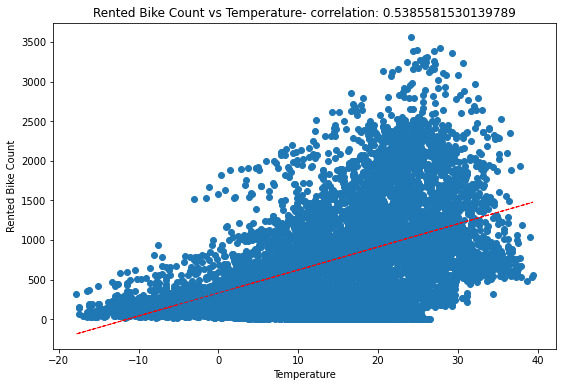

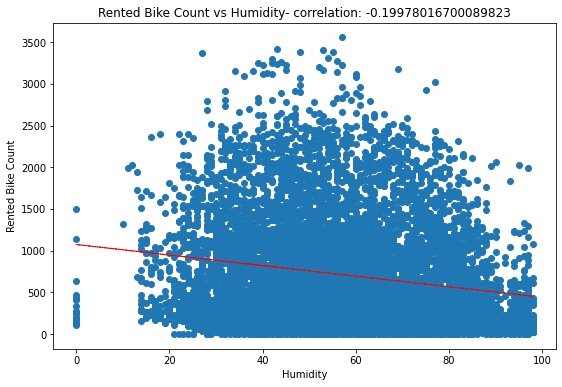

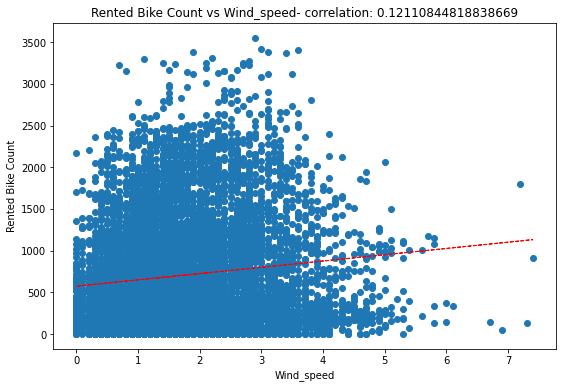

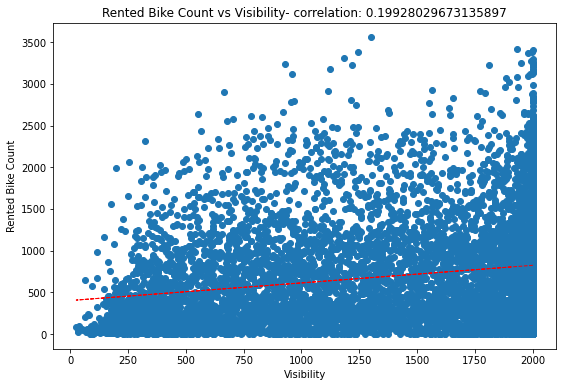

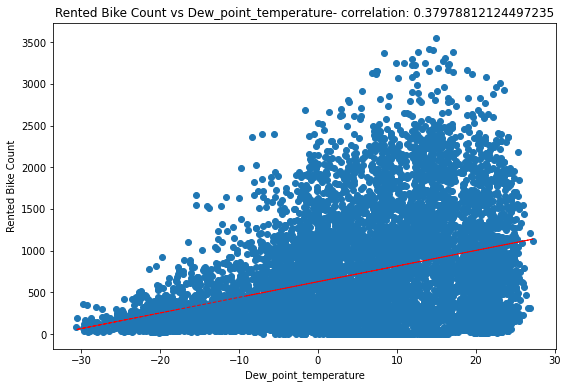

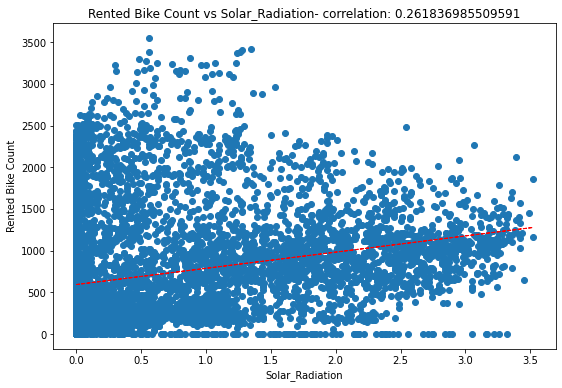

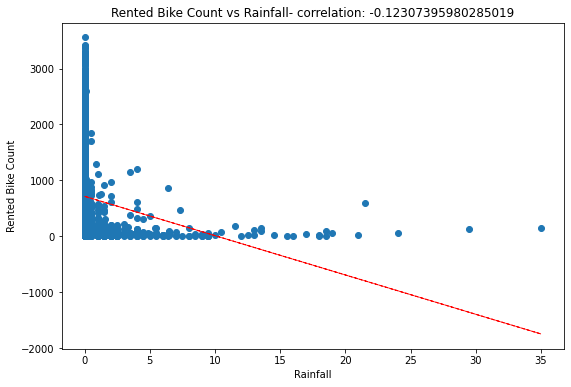

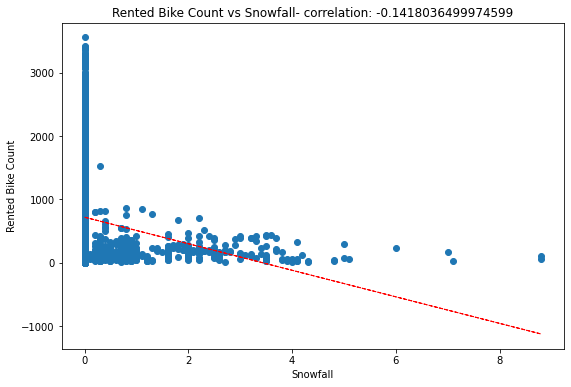

In [ ]:
# bivariant plot b/w target value and numeric features
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = renting_df1[col]
    label = renting_df1['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(renting_df1[col], renting_df1['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(renting_df[col])

    plt.plot(renting_df1[col], y_hat, "r--", lw=1)

In [ ]:
# Splitting data into holiday and non-holiday
renting_df1_h = renting_df1[renting_df1['Holiday'] == 'Holiday']
renting_df1_nh = renting_df1[renting_df1['Holiday'] == 'No Holiday']

encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0}}
renting_df1_h = renting_df1_h.replace(encoders_nums)
renting_df1_nh = renting_df1_nh.replace(encoders_nums)

bin_size = 4
renting_df1_h['Temperature1'] = renting_df1_h['Temperature']//bin_size
renting_df1_nh['Temperature1'] = renting_df1_nh['Temperature']//bin_size
mean_count_vs_temp_h = renting_df1_h.groupby('Temperature1')['Rented_Bike_Count'].mean()
mean_count_vs_temp_nh = renting_df1_nh.groupby('Temperature1')['Rented_Bike_Count'].mean()
labels_h = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_h))]
labels_nh = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(len(mean_count_vs_temp_nh))]

([<matplotlib.axis.XTick at 0x7f07cc2308b0>,
 [Text(0, 0, '0 to 4'),
  Text(0, 0, '4 to 8'),
  Text(0, 0, '8 to 12'),
  Text(0, 0, '12 to 16'),
  Text(0, 0, '16 to 20'),
  Text(0, 0, '20 to 24'),
  Text(0, 0, '24 to 28'),
  Text(0, 0, '28 to 32'),
  Text(0, 0, '32 to 36'),
  Text(0, 0, '36 to 40'),
  Text(0, 0, '40 to 44'),
  Text(0, 0, '44 to 48'),
  Text(0, 0, '48 to 52'),
  Text(0, 0, '52 to 56'),
  Text(0, 0, '56 to 60')])

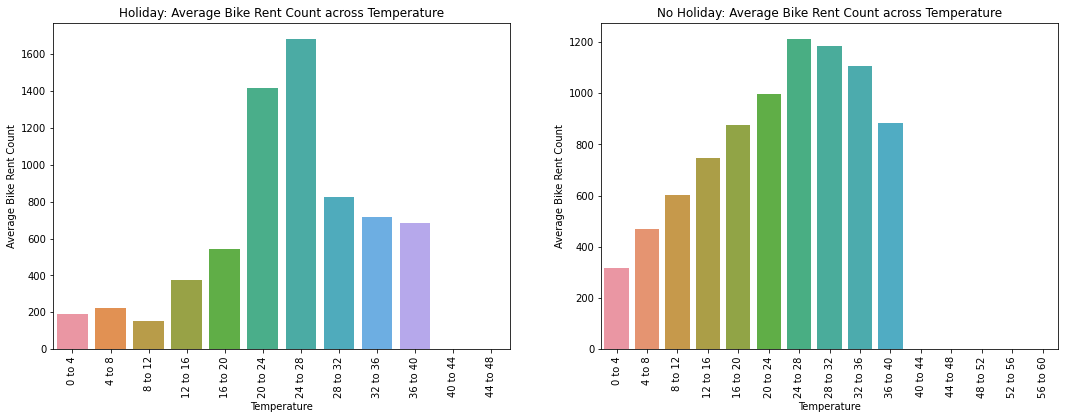

In [ ]:
# plot for deeper understanding the effect of temperature on average bike count on Holiday and No Holiday
fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
idx_h, idx_nh = range(len(mean_count_vs_temp_h)), range(len(mean_count_vs_temp_nh))
sns.barplot(x = renting_df1_h.groupby('Temperature1')['Rented_Bike_Count'].mean().reset_index()['Temperature1'], y = renting_df1_h.groupby('Temperature1')['Rented_Bike_Count'].mean(), ax = axes)
plt.xlabel('Temperature')
plt.ylabel('Average Bike Rent Count')
plt.title('Holiday: Average Bike Rent Count across Temperature')
plt.xticks(idx_h, labels_h, rotation=90)

axes = fig.add_subplot(1, 2, 2)
sns.barplot(x = renting_df1_nh.groupby('Temperature1')['Rented_Bike_Count'].mean().reset_index()['Temperature1'], y = renting_df1_nh.groupby('Temperature1')['Rented_Bike_Count'].mean(), ax = axes)
plt.xlabel('Temperature')
plt.ylabel('Average Bike Rent Count')
plt.title('No Holiday: Average Bike Rent Count across Temperature')
plt.xticks(idx_nh, labels_nh, rotation=90)

INFERENCE:

From the above bar plot, we notice that there is a increase in the average bikes rented with temperature and a small decrease at the highest temperature bin.

**Overall Numeric feature observation:**

* Higher reservations can be seen at around 8am and 6pm (office hours) and very few reservations at very early in the morning.
* We can notice that in general, more people tend to prefer biking at moderate to high temperatures; however, if the temperature is too hot there is a small decline in count.
* Temperature, Windspeed, Visibility, Dew point temperature, Solar radiation have a positive correlation with bike rents.
* Humidity, Rainfall, Snowfall have a negative correlation with bike rents.

**Categorical Feature:**

In [ ]:
# categorical_features contains all the categorical columns.
categorical_features = renting_df1.describe(include = 'object').columns
categorical_features

Index(['Date', 'Seasons', 'Holiday', 'Functioning_Day'], dtype='object')

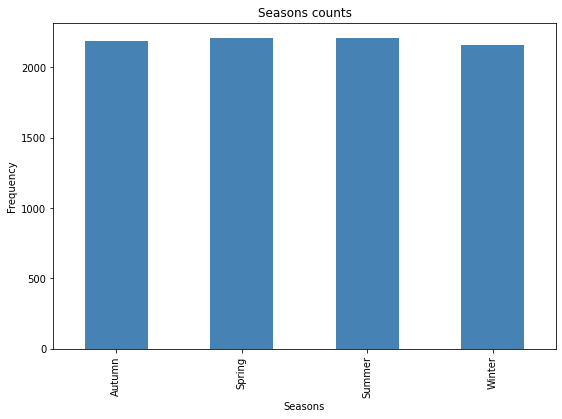

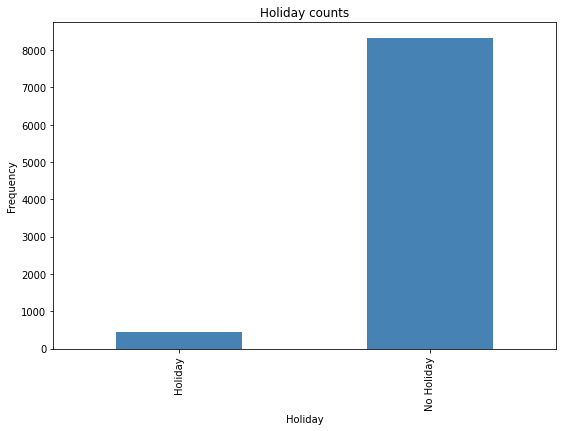

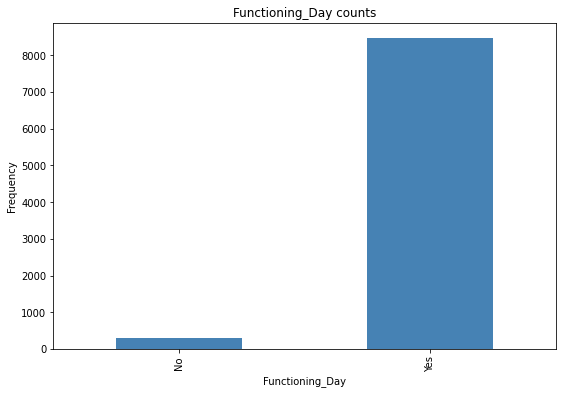

In [ ]:
# categorical_features plots
for col in [i for i in categorical_features if i not in ['Date']]:
    counts = renting_df1[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")

**Rented Bike Count vs. Seasons, Holiday, Functioning Day**

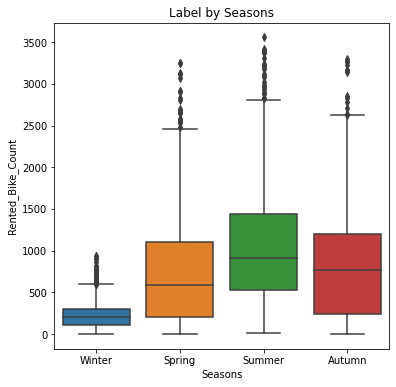

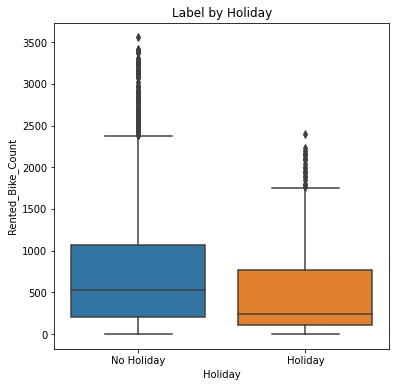

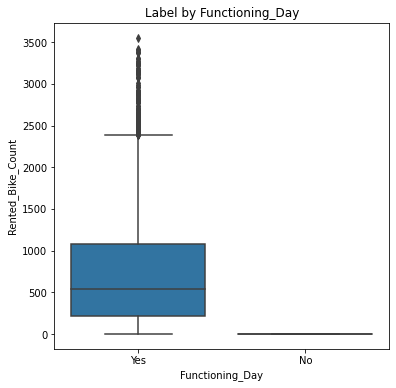

In [ ]:
# Rented Bike Count across the various categorical data (Seasons, Holiday, Functioning Day)
for col in [i for i in categorical_features if i not in ['Date']]:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    sns.boxplot(x = col, y = "Rented_Bike_Count", data=renting_df1)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented_Bike_Count")

Inference:

* Rented Bike Count are lesser in Winter season compared to other seasons.
* Lots of outlier points in every season and for 'No Holiday'.
* More bikes are rented on working days.
* On the non functioning day there are no bike rented.

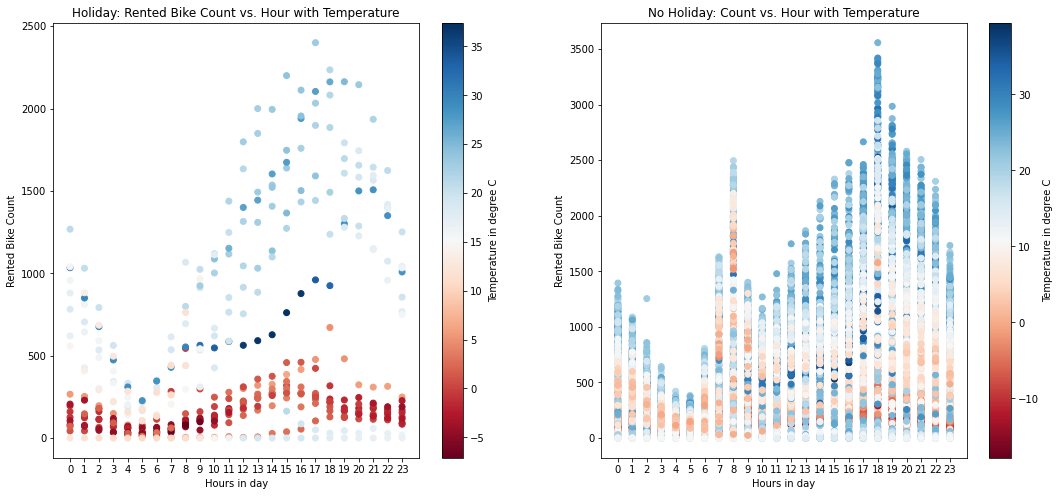

In [ ]:
# Rented Bike Count vs. hour with temperature
fig = plt.figure(figsize=(18, 8))
# Holiday
axes = fig.add_subplot(1, 2, 1)
f = axes.scatter(renting_df1_h.Hour, renting_df1_h['Rented_Bike_Count'], c=renting_df1_h.Temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Rented Bike Count', title='Holiday: Rented Bike Count vs. Hour with Temperature')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

# No Holiday
axes = fig.add_subplot(1, 2, 2)
f = axes.scatter(renting_df1_nh.Hour, renting_df1_nh['Rented_Bike_Count'], c=renting_df1_nh.Temperature, cmap = 'RdBu')
axes.set(xticks = range(24), xlabel='Hours in day', ylabel='Rented Bike Count', title='No Holiday: Count vs. Hour with Temperature')
cbar = plt.colorbar(f)
cbar.set_label('Temperature in degree C')

**Date feature**

In [ ]:
# Splitting datetime object into month, date, hour and day category columns
renting_df1["Date"] = pd.to_datetime(renting_df.Date, format='%d/%m/%Y')
renting_df1['month'] = renting_df1["Date"].dt.month
renting_df1['day_of_week'] = renting_df1["Date"].dt.dayofweek
renting_df1['day_of_month'] = renting_df1["Date"].dt.day

In [ ]:
date_numeric_feature = ['month', 'day_of_week', 'day_of_month']

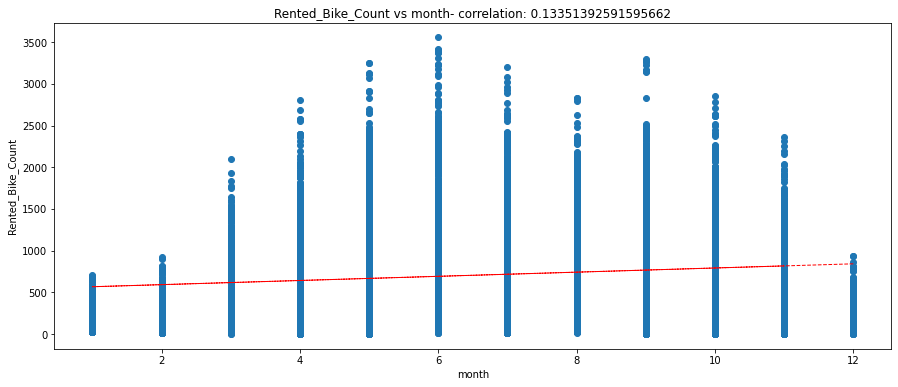

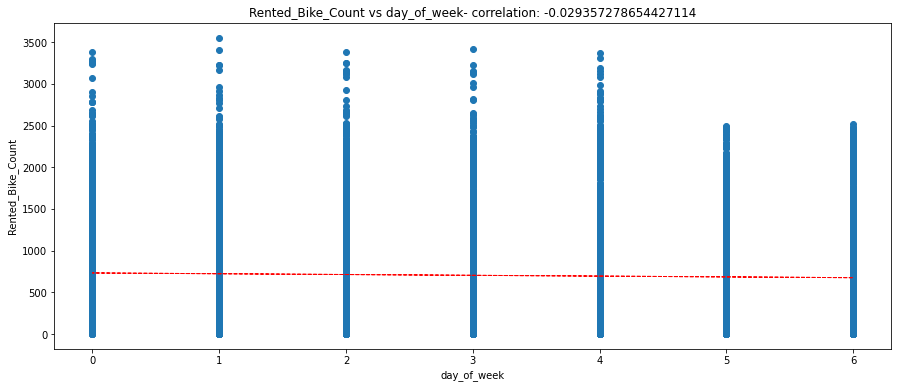

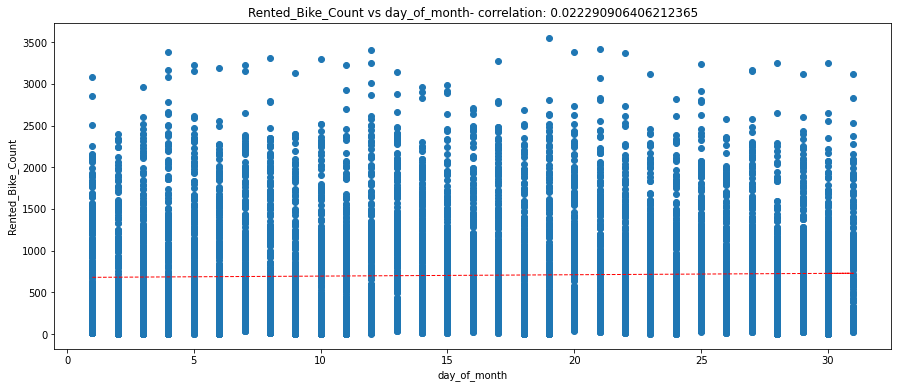

In [ ]:
# plot a bar plot for each date numerical feature vs rented bike count

for col in date_numeric_feature:
    fig = plt.figure(figsize=(15, 6))
    ax = fig.gca()
    feature = renting_df1[col]
    label = renting_df1['Rented_Bike_Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_Bike_Count')
    ax.set_title('Rented_Bike_Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(renting_df1[col], renting_df1['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(renting_df1[col])

    plt.plot(renting_df1[col], y_hat, "r--", lw=1)

[Text(0, 0.5, 'Rented_Bike_Count'),
 Text(0.5, 0, 'Hour in the day'),
 Text(0.5, 1.0, 'Average Bike Rentals by the day across Weekdays')]

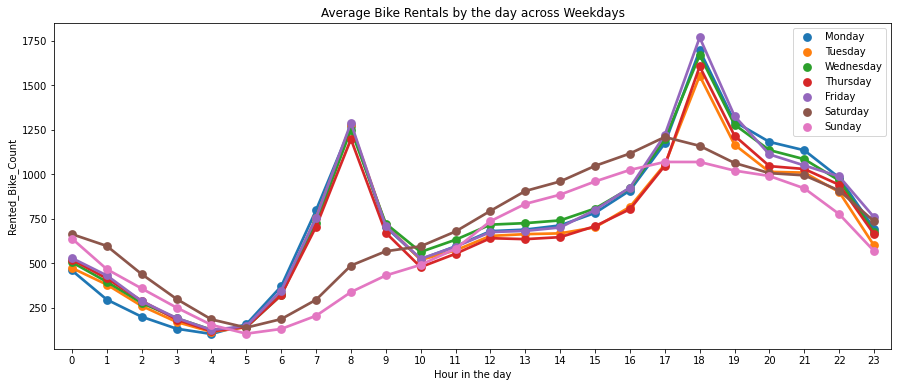

In [ ]:
# Average Bike Rentals by the day across week days

f, axes = plt.subplots(1, 1, figsize=(15, 6))
group_day_hour = pd.DataFrame(renting_df1.groupby(['day_of_week', 'Hour'])['Rented_Bike_Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='Rented_Bike_Count', hue='day_of_week', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axes.set(xlabel='Hour in the day', ylabel='Rented_Bike_Count', title='Average Bike Rentals by the day across Weekdays')

[Text(0.5, 1.0, 'Hourly Rented Bike Count based on Holiday or no Holiday')]

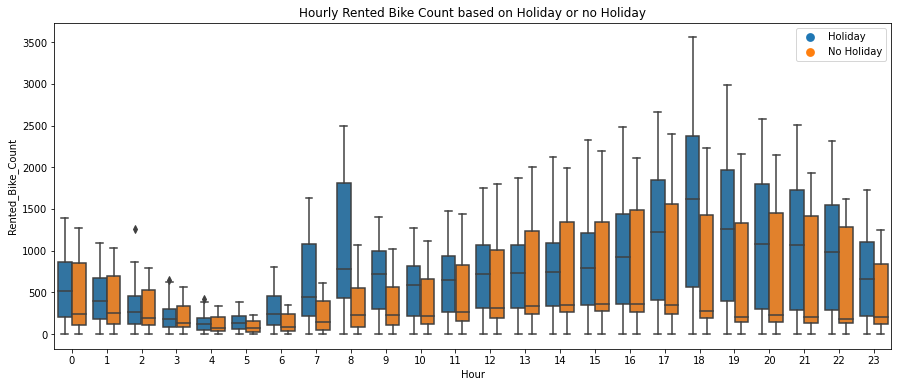

In [ ]:
# seaborn boxplots across hours

f, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=renting_df1, y='Rented_Bike_Count', x='Hour', hue='Holiday', ax=ax)
handles, _ = axes.get_legend_handles_labels()
ax.legend(handles, ['Holiday', 'No Holiday'])
ax.set(title='Hourly Rented Bike Count based on Holiday or no Holiday')

[Text(0.5, 1.0, 'Hourly Rented Bike Count based on Holiday or no Holiday')]

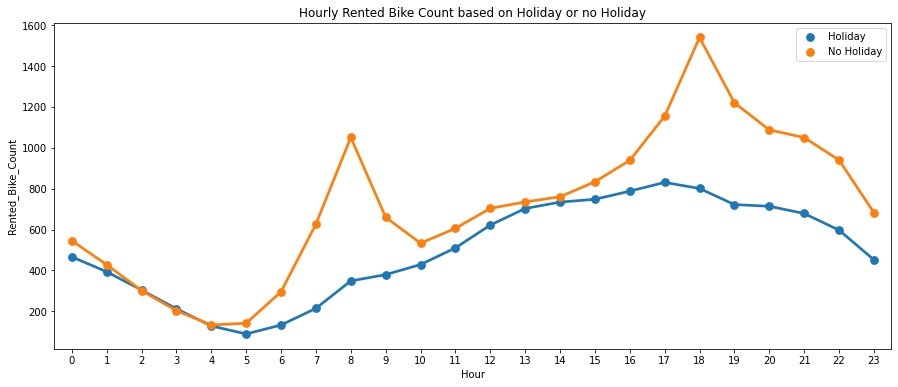

In [ ]:
# seaborn boxplots across hours

f, ax = plt.subplots(1, 1, figsize=(15, 6))
rented_bike_count_mean_hour = pd.DataFrame(renting_df1.groupby(['Holiday', 'Hour'])['Rented_Bike_Count'].mean()).reset_index()
sns.pointplot(data=rented_bike_count_mean_hour, y='Rented_Bike_Count', x='Hour', hue='Holiday', ax=ax)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Holiday', 'No Holiday'])
ax.set(title='Hourly Rented Bike Count based on Holiday or no Holiday')

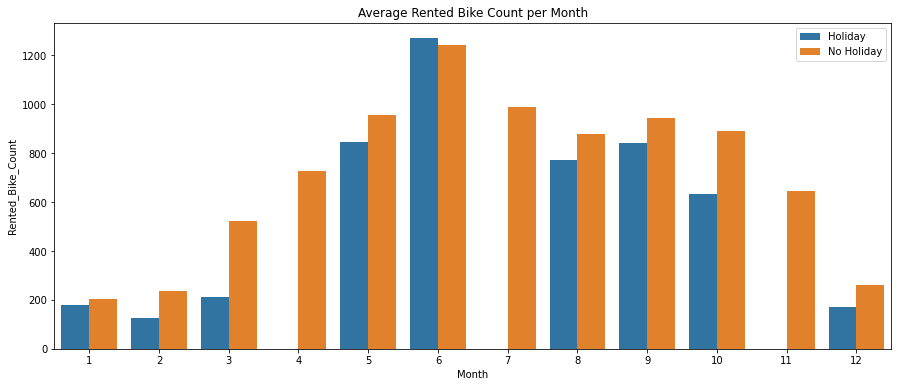

In [ ]:
# Average Monthly Count Distribution plot

f, ax = plt.subplots(1, 1, figsize=(15, 6))
group_month = pd.DataFrame(renting_df1.groupby(['month', 'Holiday'])['Rented_Bike_Count'].mean()).reset_index()
sns.barplot(data=group_month, x='month', y='Rented_Bike_Count', hue='Holiday', ax=ax)
handles, _ = ax.get_legend_handles_labels()
ax.set(xlabel='Month', ylabel='Rented_Bike_Count', title='Average Rented Bike Count per Month')
ax.legend(handles, ['Holiday', 'No Holiday'])

* Very few number of outliers can be seen in the seaborn box plot across hours.
* Higher reservations can be seen at around 8am and 6pm (office hours) and very low reservations at very early in the morning.
No Holiday: There is a peak in the rentals at around 8am and another at around 6pm.
Holiday: There is slight increase in rentals across the day with a peak at 5pm. These correspond to probably tourists.
Also, we can see that we have highest bike rents in June. No holidays in 4th, 7th, and 11th month.

Text(0.5, 1.0, ' Heatmap for correlation between all the numerical features ')

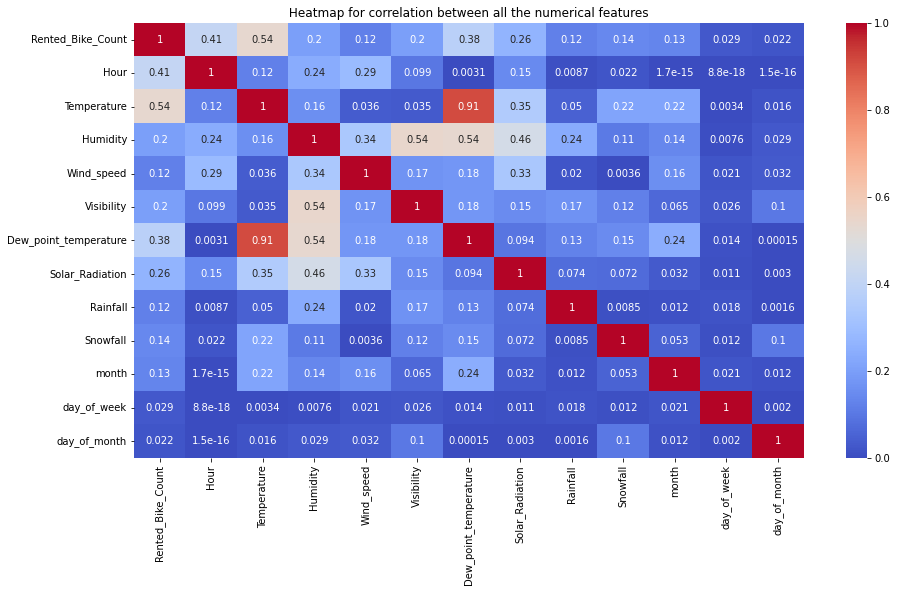

In [ ]:
#Correlation
plt.figure(figsize=(15,8))
correlation = renting_df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title(' Heatmap for correlation between all the numerical features ')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
numeric_features = [i for i in renting_df1.describe().columns if i not in ['Rented_Bike_Count', 'Dew_point_temperature']]
calc_vif(renting_df1[numeric_features])

,variables,VIF
0,Hour,4.019774
1,Temperature,3.308515
2,Humidity,7.407425
3,Wind_speed,4.669663
4,Visibility,5.600624
5,Solar_Radiation,2.301785
6,Rainfall,1.082041
7,Snowfall,1.141194
8,month,5.041744
9,day_of_week,3.124912


Inferences from the above heatmap:

* Temperature and Dew point temperature are highly correlated.
* We see a positive correlation between Rented Bike Count and Temperature (as seen in the scatter plot). This is probably only true for the range of temperatures provided.
* We see a negative correlation between Rented Bike Count and Humidity. The more the humidity, the less people prefer to ride.
* Rented Bike Count has a weak dependence on day_of_month, day_of_week.

**Summary**

* Seasons: Month column has a direct mapping with season (Winter:December, January, and February, Summer: June to August, Autumn: September to November and Spring: March to May). Hence we will drop Seasons column.
* Functioning Day: The bikes rented on Non-functioning days are zero, so we remove the rows of non-functioing day and we will drop Functioning Day column.
* Temperature: Temperature and Dew point temperature are highly correlated. Hence retain only the Temperature column.
* Date: Intuitively, there should be no dependency on date. Hence drop this column.
* Hour: Split hour column to hour_0, hour_1, ..., hour_23. Drop hour_23 since it is a function of the rest of the hour columns.

### **Feature Engineering**

In [ ]:
renting_df1.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'month', 'day_of_week', 'day_of_month'],
      dtype='object')

In [ ]:
renting_df_data = renting_df1.copy()
renting_df_data = renting_df_data[renting_df_data['Functioning_Day'] == 'Yes']
renting_df_data.drop('Functioning_Day', axis = 1, inplace =True)

In [ ]:
def Holiday_label(row):
  if str(row) == 'Holiday':
    return 1
  else :
    return 0

In [ ]:
renting_df_data['Holiday']=renting_df_data.apply(lambda row : Holiday_label(row['Holiday']),axis=1)

renting_df_data['Holiday'].value_counts()

0    8057
1     408
Name: Holiday, dtype: int64

In [ ]:
def Seasons_label(row):
  if str(row) == 'Winter':
    return 0
  elif str(row) == 'Autumn':
    return 1
  elif str(row) == 'Spring':
    return 2
  elif  str(row) == 'Summer':
    return 3

In [ ]:
renting_df_data['Seasons']=renting_df_data.apply(lambda row : Seasons_label(row['Seasons']),axis=1)

renting_df_data['Seasons'].value_counts()

3    2208
0    2160
2    2160
1    1937
Name: Seasons, dtype: int64

In [ ]:
def hour_label(row):
  if row in range(2, 12):
    return 0
  elif row in range(12, 17):
    return 1
  elif row in range(17, 23):
    return 2
  else :
    return 3

In [ ]:
renting_df_data['Hour']=renting_df_data.apply(lambda row : hour_label(row['Hour']),axis=1)

renting_df_data['Hour'].value_counts()

0    3525
2    2118
1    1765
3    1057
Name: Hour, dtype: int64

In [ ]:
# Data for all the independent variables
renting_df_data = renting_df_data.drop(labels='Date',axis=1)
renting_df_data = renting_df_data.drop(labels='Dew_point_temperature',axis=1,)

In [ ]:
renting_df_data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,month,day_of_week,day_of_month
0,254,3,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,12,4,1
1,204,3,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,12,4,1
2,173,0,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,12,4,1
3,107,0,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,12,4,1
4,78,0,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,12,4,1


In [ ]:
renting_df_data.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'month', 'day_of_week', 'day_of_month'],
      dtype='object')

In [ ]:
renting_df_data.drop(['day_of_week', 'day_of_month'], axis = 1, inplace = True)

In [ ]:
renting_df_data.drop(['month'], axis = 1, inplace = True)

In [ ]:
#Train test split

feature = [i for i in renting_df_data.columns if i not in ['Rented_Bike_Count']]
X1 = renting_df_data[feature]
y1 = renting_df_data['Rented_Bike_Count']

In [ ]:
from sklearn.model_selection import train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size = 0.2, random_state = 42) 
print(X1_train.shape)
print(X1_test.shape)

(6772, 10)
(1693, 10)


In [ ]:
#Train test split
from scipy.stats import zscore
feature = [i for i in renting_df_data.columns if i not in ['Rented_Bike_Count']]
X = renting_df_data[feature].apply(zscore)
y = renting_df_data['Rented_Bike_Count']

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(6772, 10)
(1693, 10)


### **Linear Regression**

In [ ]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# linear regression score
reg.score(X_train, y_train)

0.46424199851601644

In [ ]:
# linear regression coefficients
linear_coeff = reg.coef_
linear_coeff

array([ 117.65550144,  439.54935948, -184.61688875,   31.01721363,
          2.37526112,  -49.55054406,  -63.96479451,   11.41905117,
        -37.22023253,  -34.62969936])

In [ ]:
# linear regression intercept
reg.intercept_

733.7494846602633

In [ ]:
# train and test linear regression prediction
y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

In [ ]:
# metrics

MSE_LR_train  = mean_squared_error(y_train, y_train_pred)
print("MSE for train dataset:" , MSE_LR_train)

MSE_LR_test  = mean_squared_error(y_test, y_pred)
print("MSE for test dataset:" , MSE_LR_test)

RMSE_LR_test = np.sqrt(MSE_LR_test)
print("RMSE for test dataset:" ,RMSE_LR_test)

from sklearn.metrics import r2_score
r2_LR_test = r2_score(y_test, y_pred)
print("R2 for test dataset:" ,r2_LR_test)
print("Adjusted R2 for test dataset: ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE for train dataset: 223698.42139606664
MSE for test dataset: 204996.771287474
RMSE for test dataset: 452.7656913763166
R2 for test dataset: 0.47783012630443855
Adjusted R2 for test dataset:  0.4747256680779489


In [ ]:
y_pred

array([1713.95443912, 1106.65293321, 1322.83713121, ...,  358.10395885,
       1129.99686585, 1131.54566143])

In [ ]:
np.array(y_test)

array([1232,  964,  942, ...,   10, 1197, 1683])

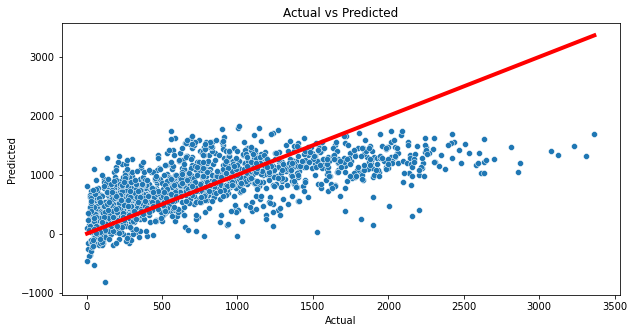

In [ ]:
fig,ax = plt.subplots(figsize = (10, 5))
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
sns.scatterplot(x=y_test, y=y_pred, ax = ax)
sns.lineplot(x=[min(y_test),max(y_test)], y=[min(y_test),max(y_test)], linewidth=4, color='red', ax=ax)

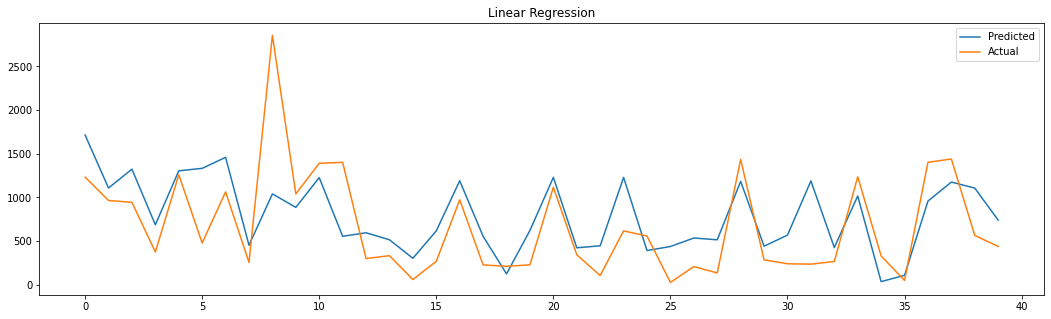

In [ ]:
#plotting first 40 values of actual and predicted values of test data.
plt.figure(figsize=(18,5))
plt.plot(y_pred[:40])
plt.plot(np.array(y_test)[:40])
plt.legend(["Predicted","Actual"])
plt.title('Linear Regression')
plt.show()

Observations

* Since the RMSE value of train and test data are quite close, the model doesn't seems to be an overfit model.
* Overall, a good initial model.

### **Regularization Model - Lasso**

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso(random_state=2)
# Hyperparameter Tuning
parameters = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=2),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20,
                                   50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
# best parameters
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.2}

Using  {'alpha': 0.2}  the negative mean squared error is:  -224519.89236288937


In [ ]:
# lasso regression prediction for train and test data
y_train_pred_lasso = lasso_regressor.predict(X_train)
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# lasso coefficients
lasso_coeff = lasso_regressor.best_estimator_.coef_

In [ ]:
MSE_L1_train  = mean_squared_error(y_train, y_train_pred_lasso)
print("MSE for train :" , MSE_L1_train)

MSE_L1_test  = mean_squared_error(y_test, y_pred_lasso)
print("MSE for test :" , MSE_L1_test)

RMSE_L1_test = np.sqrt(MSE_L1_test)
print("RMSE for test:" ,RMSE_L1_test)

from sklearn.metrics import r2_score
r2_L1_test = r2_score(y_test, y_pred_lasso)
print("R2 for test:" ,r2_L1_test)
print("Adjusted R2 for test: ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE for train : 223699.43128092855
MSE for test : 205001.04439842398
RMSE for test: 452.7704102505198
R2 for test: 0.477819241792497
Adjusted R2 for test:  0.4747147188542836


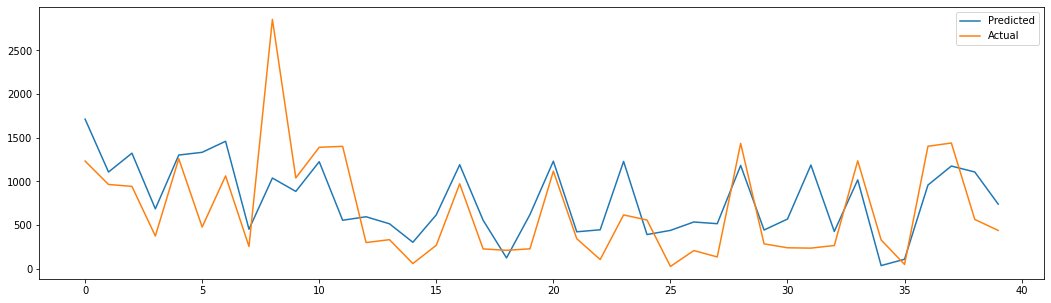

In [ ]:
#plotting first 40 values of actual and predicted values of test data.
plt.figure(figsize=(18,5))
plt.plot(y_pred_lasso[:40])
plt.plot(np.array(y_test)[:40])
plt.legend(["Predicted","Actual"])
plt.show()

Observation:

Similar performance as linear regression. It was quite expected because the linear regression didn't seem to be overfitted.

### **Regularization Model - Ridge**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge(random_state=42)
# hyperparameter tuning
parameters = {'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 25]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100,
                                   25]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -224522.56284298492


In [ ]:
# ridge regression output for test and train data.
y_train_pred_ridge = ridge_regressor.predict(X_train)
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# ridge coefficient
ridge_coeff = ridge_regressor.best_estimator_.coef_

In [ ]:
MSE_L2_train = mean_squared_error(y_train, y_train_pred_ridge)
print("MSE for train data :" , MSE_L2_train)

MSE_L2_test = mean_squared_error(y_test, y_pred_ridge)
print("MSE for test data :" , MSE_L2_test)

RMSE_L2_test = np.sqrt(MSE_L2_test)
print("RMSE for test data :" ,RMSE_L2_test)

from sklearn.metrics import r2_score
r2_L2_test = r2_score(y_test, y_pred_ridge)
print("R2 for test :" ,r2_L2_test)
print("Adjusted R2 for test: ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE for train data : 223698.98944639534
MSE for test data : 204991.58322222214
RMSE for test data : 452.75996203531747
R2 for test : 0.4778433413973411
Adjusted R2 for test:  0.47473896173858565


Observation:

Similar performance as linear regression. It was quite expected because the linear regression didn't seem to be overfitted.

Text(0.5, 1.0, 'Comparision among Linear Regression, Lasso, Ridge coefficients')

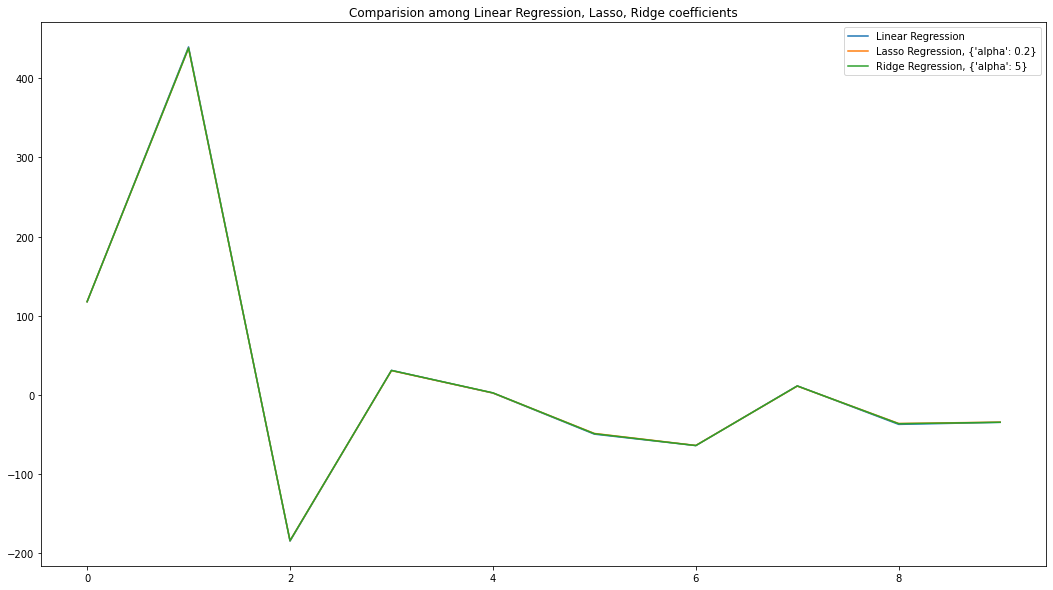

In [ ]:
# Feature Coefficient Comparison: Linear vs. Ridge vs. Lasso
fig = plt.figure(figsize=(18, 10))
    
# Working day plot
axes = fig.add_subplot(1, 1, 1)
axes.plot(linear_coeff)
axes.plot(lasso_coeff)
axes.plot(ridge_coeff)
axes.legend(["Linear Regression", "Lasso Regression, {}".format(lasso_regressor.best_params_),"Ridge Regression, {}".format(ridge_regressor.best_params_)])
plt.title('Comparision among Linear Regression, Lasso, Ridge coefficients')

Observation:
The coeffs are overlapping. That means there is no need to regularise the linear regression.

### **Decision Tree Regression**

In [ ]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
#min_samples_leaf = 21
model = DecisionTreeRegressor(min_samples_leaf=21).fit(X_train,y_train)
y_train_predictions = model.predict(X_train)
y_predictions = model.predict(X_test) # These are the predictions from the test data.
model.score(X_test,y_test)

0.7933125023196768

In [ ]:
MSE_DT_train = mean_squared_error(y_train, y_train_predictions)
print("MSE for train:" , MSE_DT_train)

MSE_DT_test = mean_squared_error(y_test, y_predictions)
print("MSE for test:" , MSE_DT_test)

RMSE_DT_test = np.sqrt(MSE_DT_test)
print("RMSE for test:" ,RMSE_DT_test)

from sklearn.metrics import r2_score
r2_DT_test = r2_score(y_test, y_predictions)
print("R2 for test:" ,r2_DT_test)
print("Adjusted R2 for test: ",1-(1-r2_score(y_test, y_predictions))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE for train: 67588.15471419635
MSE for test: 81142.69287518585
RMSE for test: 284.8555649363127
R2 for test: 0.7933125023196768
Adjusted R2 for test:  0.7920836824761552


OBSERVATION:

We know that Decision tree and Linear Regression models are preferred over Random forest, Neural Networks, or XGBoost algorithm if we need quicker results.

### **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
## Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters.

param_grid = {'n_estimators': [50, 100, 200, 500, 1000, 2000, 5000]}
rf_regression = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
rf_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'n_estimators': [50, 100, 200, 500, 1000, 2000, 5000]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_regression.best_params_))

Best parameters for Random Forest Regression Model: {'n_estimators': 2000}


In [ ]:
param_grid = {'n_estimators': [5000], 'min_samples_leaf':[1, 3, 7, 10, 20, 50]}
rf_regression = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
rf_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'min_samples_leaf': [1, 3, 7, 10, 20, 50],
                         'n_estimators': [5000]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_regression.best_params_))

Best parameters for Random Forest Regression Model: {'min_samples_leaf': 1, 'n_estimators': 5000}


In [ ]:
param_grid = {'n_estimators': [5000], 'min_samples_leaf':[1], 'max_depth':[5, 8, 10, 20, 30, 40, 50, 70]}
rf_regression = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
rf_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 8, 10, 20, 30, 40, 50, 70],
                         'min_samples_leaf': [1], 'n_estimators': [5000]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_regression.best_params_))

Best parameters for Random Forest Regression Model: {'max_depth': 40, 'min_samples_leaf': 1, 'n_estimators': 1000}


In [ ]:
param_grid = {'n_estimators': [5000], 'min_samples_leaf':[1], 'max_depth':[40], 'min_samples_split':[0.0001, 0.001, 0.002, 0.005, 0.01]}
rf_regression = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
rf_regression.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [40], 'min_samples_leaf': [1],
                         'min_samples_split': [0.0001, 0.001, 0.002, 0.005,
                                               0.01],
                         'n_estimators': [5000]},
             scoring='neg_mean_squared_error')

In [ ]:
print('Best parameters for Random Forest Regression Model: {}'.format(rf_regression.best_params_))

Best parameters for Random Forest Regression Model: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 0.0001, 'n_estimators': 5000}


In [ ]:
model = RandomForestRegressor(n_jobs=-1, max_depth = 40, n_estimators = 5000, min_samples_leaf = 1, min_samples_split = 0.0001).fit(X_train,y_train)
y_predictions = model.predict(X_test)
model.score(X_test,y_test)

0.843711554976021

In [ ]:
y_train_pred = model.predict(X_train)

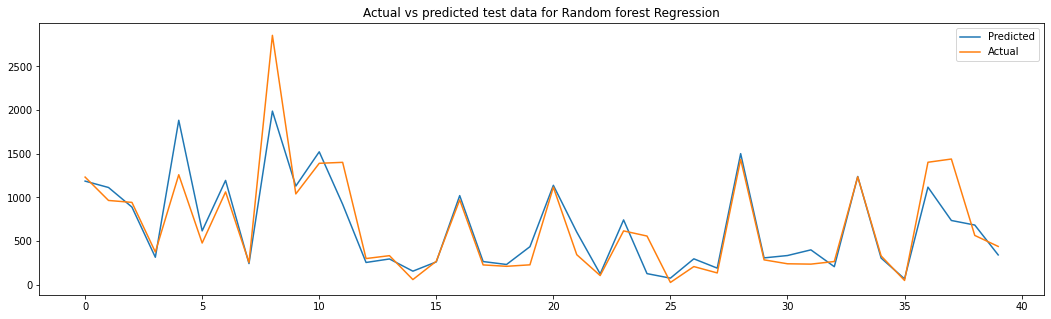

In [ ]:
#plotting first 40 values of actual and predicted values of test data.
plt.figure(figsize=(18,5))
plt.plot(y_predictions[:40])
plt.plot(np.array(y_test)[:40])
plt.legend(["Predicted","Actual"])
plt.title('Actual vs predicted test data for Random forest Regression')
plt.show()

In [ ]:
MSE_RF_train = mean_squared_error(y_train, y_train_pred)
print("MSE for train:" , MSE_RF_train)

MSE_RF_test = mean_squared_error(y_test, y_predictions)
print("MSE for test:" , MSE_RF_test)

RMSE_RF_test = np.sqrt(MSE_RF_test)
print("RMSE for test:" ,RMSE_RF_test)

from sklearn.metrics import r2_score
r2_RF_test = r2_score(y_test, y_predictions)
print("R2 for test:" ,r2_RF_test)
print("Adjusted R2 for test: ",1-(1-r2_score(y_test, y_predictions))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE for train: 9249.220362059234
MSE for test: 61356.7121226433
RMSE for test: 247.70287063868133
R2 for test: 0.843711554976021
Adjusted R2 for test:  0.8426888465314858


[(0.0, 1.0), (-1.0, 11.0)]

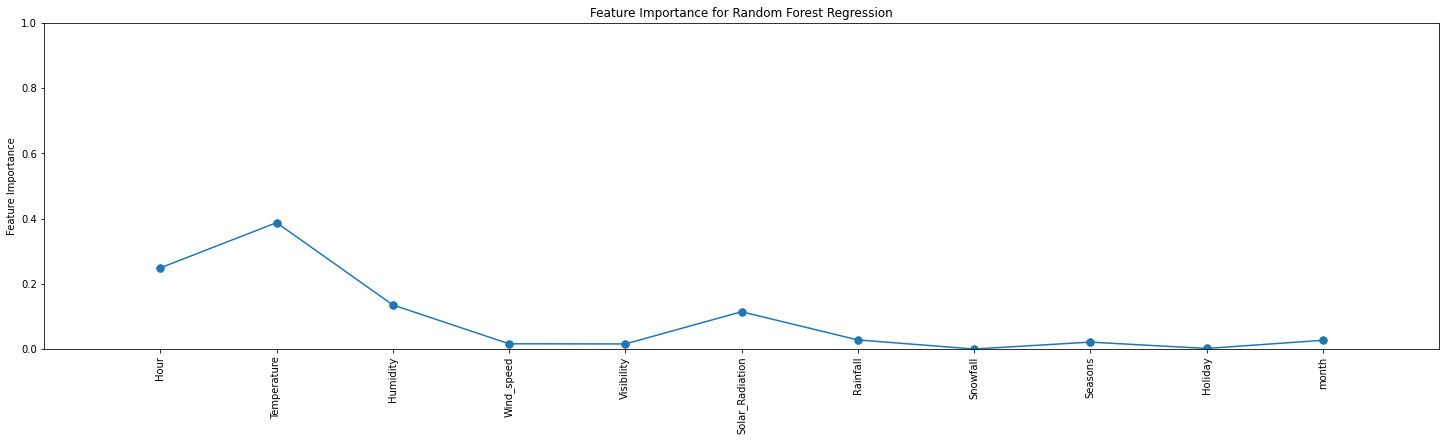

In [ ]:
# Plotting the Feature Importance
fig = plt.figure(figsize=(25, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(model.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(model.feature_importances_)), feature, rotation=90)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression')
axes.set(xlim=[-1, len(feature)], ylim=[0, 1])

* 'Temperature' feature holds maximum importance. We saw spikes and dips in count value depending on the temperature.
* 'Humidity' feature also has good importance.

RMSLE score for Random Forest Regressor using a small tree (max_depth = 3) for simple visualization = 247.370


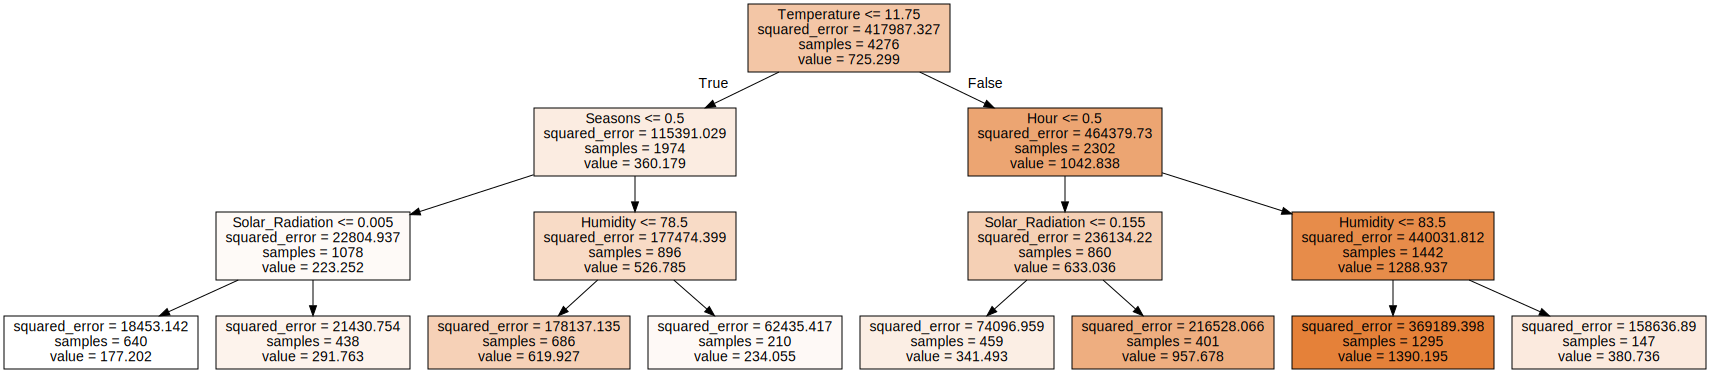

In [ ]:
# Visualizing a graph limiting the tree to 3 levels to gain some understanding 
rf_small = RandomForestRegressor(n_estimators=10, max_features = 'auto', max_depth=3, random_state=42)
rf_small.fit(X_train, y_train)
y_predict_small = rf_small.predict(X_test)
rmse_small = np.sqrt(mean_squared_error(y_test, y_predictions))
print('RMSLE score for Random Forest Regressor using a small tree (max_depth = 3) for simple visualization = {0:.3f}'.format(rmse_small))

# Import tools needed for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# Pull out one tree from the forest
tree1 = rf_small.estimators_[0]
graph = Source(tree.export_graphviz(tree1, out_file=None, feature_names=feature, class_names=['0', '1'] , filled = True))
display(SVG(graph.pipe(format='svg')))

 **Summary**

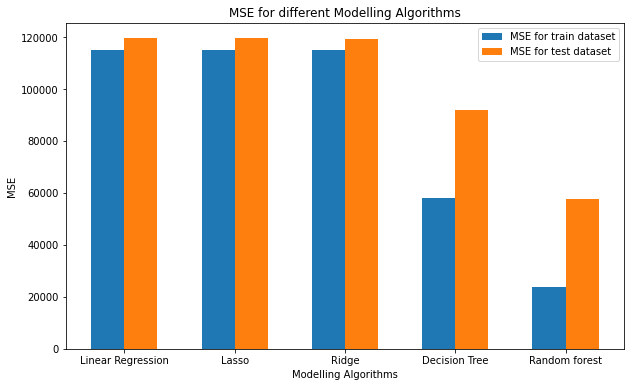

In [ ]:
N = 5
ind = np.arange(N)
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
plt.bar(ind, [MSE_LR_train, MSE_L1_train, MSE_L2_train, MSE_DT_train, MSE_RF_train], bar_width, label='MSE for train dataset')
plt.bar(ind + bar_width, [MSE_LR_test, MSE_L1_test, MSE_L2_test, MSE_DT_test, MSE_RF_test], bar_width, label='MSE for test dataset')
plt.xlabel('Modelling Algorithms')
plt.ylabel('MSE')
plt.title('MSE for different Modelling Algorithms')
plt.xticks(ind + bar_width / 2, ('Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Random forest'))
plt.legend()

In [ ]:
def Cal_adj_r2_score(r2score):
  return (1-(1- r2score)*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

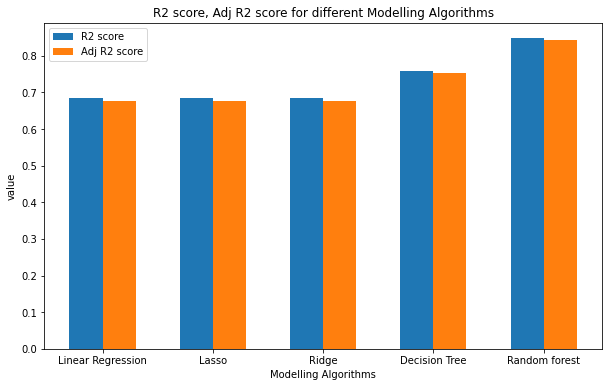

In [ ]:
N = 5
ind = np.arange(N)
fig=plt.figure(figsize=(10, 6))
axes=fig.add_subplot(1, 1, 1)
bar_width = 0.3
plt.bar(ind, [r2_LR_test, r2_L1_test, r2_L2_test, r2_DT_test, r2_RF_test], bar_width, label='R2 score')
plt.bar(ind + bar_width, [Cal_adj_r2_score(r2_LR_test), Cal_adj_r2_score(r2_L1_test), Cal_adj_r2_score(r2_L2_test), Cal_adj_r2_score(r2_DT_test), Cal_adj_r2_score(r2_RF_test)], bar_width, label='Adj R2 score')
plt.xlabel('Modelling Algorithms')
plt.ylabel('value')
plt.title('R2 score, Adj R2 score for different Modelling Algorithms')
plt.xticks(ind + bar_width / 2, ('Linear Regression', 'Lasso', 'Ridge', 'Decision Tree', 'Random forest'))
plt.legend()

### **XGboost algorithm**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[07:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:27:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   54.1s finished


[07:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,Y_test)

0.9447339650042254

##For Train dataset:


In [ ]:

#Find R-squared value
r2 = r2_score(Y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9447339650042254

In [ ]:
adj_r2

0.9445353806168888

##For Train dataset:

In [ ]:

#Find R-squared value
r2 = r2_score(Y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_train, train_preds))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9485426027944392

In [ ]:
adj_r2

0.9484516886651008

We have nearly same r2 score for both the datasets,train and test which leads towards optimal model.

###Principal Component Analysis:


In [ ]:
# import libraries for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
# X = df.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)

In [ ]:
print(pca.components_)

[[-1.18153753e-03 -5.59596564e-04  1.84611219e-02 -3.06604467e-04
  -9.99828599e-01 -2.18479636e-04  3.14923571e-04  8.95836866e-05
   4.58745002e-05 -7.81710901e-06]
 [ 8.33484125e-02 -2.63955751e-01 -9.60011368e-01  1.67888430e-02
  -1.76904292e-02  1.77698494e-02 -1.09468539e-02 -2.22004993e-04
  -2.69764325e-02  6.18464483e-04]
 [ 1.75779308e-01  9.49682398e-01 -2.46810716e-01  7.85664204e-03
  -5.30502966e-03  3.86761950e-02 -2.27616638e-04 -8.75922136e-03
   6.80171585e-02 -7.87782427e-04]
 [ 9.80127499e-01 -1.46635537e-01  1.26154097e-01  3.19024579e-02
   1.25012311e-03 -1.46935937e-02  1.32003516e-02  4.53682891e-03
  -2.24317823e-02 -7.44074035e-06]
 [-1.74296932e-02 -4.09252963e-03 -7.65691228e-03  1.85185111e-01
   1.19674311e-04  6.47221273e-02  9.80180878e-01 -5.56436118e-03
   1.87828819e-02  1.54052880e-04]
 [ 2.77500231e-02  9.37309922e-03 -2.32676313e-02 -9.39140374e-01
  -6.10039551e-05 -2.76808750e-01  1.96361176e-01 -2.89034911e-02
  -2.42464358e-02 -3.45784200e-03

In [ ]:
print(pca.explained_variance_)

[3.71070493e+05 3.08269408e+02 1.37489840e+02 4.26688625e+01
 1.19646116e+00 9.34367180e-01 4.27018283e-01]


In [ ]:
df_pca = pd.DataFrame(X_pca,columns=['F1','F2','F3','F4','F5','F6','F7'])
df_pca['Rented_Bike_Count'] = SeoulBikeData['Rented_Bike_Count']

In [ ]:
df_pca.head()

,F1,F2,F3,F4,F5,F6,F7,Rented_Bike_Count
0,-566.396379,14.111535,-16.994444,-10.547954,0.380509,-0.308301,-0.183059,254.0
1,-566.378502,13.290555,-17.361379,-9.442345,0.097391,1.008166,0.026916,204.0
2,-566.361004,12.549227,-17.905681,-8.256366,0.111387,0.820133,-0.007089,173.0
3,-566.343582,11.723677,-18.167434,-7.123947,0.068601,0.916655,0.015741,107.0
4,-566.419149,15.617784,-16.803476,-6.633100,0.340239,-0.275446,-0.257752,78.0


In [ ]:
df_pca.corr().abs()

,F1,F2,F3,F4,F5,F6,F7,Rented_Bike_Count
F1,1.000000e+00,8.779966e-17,1.439553e-16,3.861685e-18,1.823608e-16,2.584505e-17,9.539133e-17,0.099815
F2,8.779966e-17,1.000000e+00,5.552751e-16,2.314199e-16,1.229917e-16,3.971971e-17,9.775355e-17,0.130500
F3,1.439553e-16,5.552751e-16,1.000000e+00,6.926930e-18,1.207813e-17,3.802377e-17,8.838149e-17,0.529936
F4,3.861685e-18,2.314199e-16,6.926930e-18,1.000000e+00,4.001350e-17,1.048339e-16,2.598488e-17,0.217682
F5,1.823608e-16,1.229917e-16,1.207813e-17,4.001350e-17,1.000000e+00,4.695676e-16,7.149587e-17,0.006351
F6,2.584505e-17,3.971971e-17,3.802377e-17,1.048339e-16,4.695676e-16,1.000000e+00,3.122166e-16,0.038303
F7,9.539133e-17,9.775355e-17,8.838149e-17,2.598488e-17,7.149587e-17,3.122166e-16,1.000000e+00,0.066110
Rented_Bike_Count,9.981496e-02,1.304999e-01,5.299355e-01,2.176819e-01,6.350610e-03,3.830251e-02,6.610950e-02,1.000000


In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df_pca[[feature for feature in df_pca.describe().columns if feature not in ['Rented_Bike_Count']]])

,variables,VIF
0,F1,1.0
1,F2,1.0
2,F3,1.0
3,F4,1.0
4,F5,1.0
5,F6,1.0
6,F7,1.0


<Figure size 1152x1728 with 0 Axes>

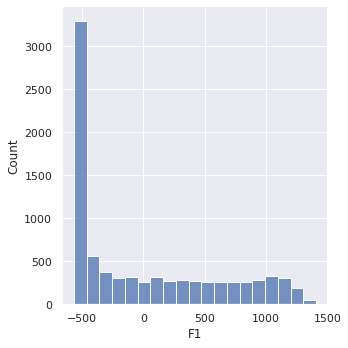

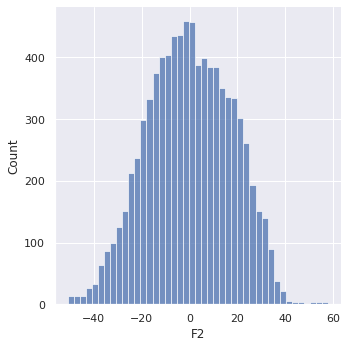

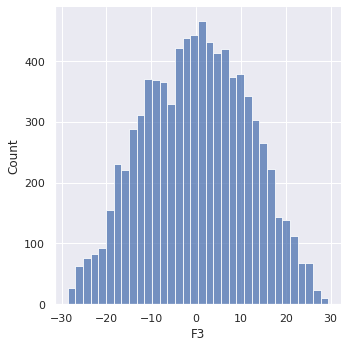

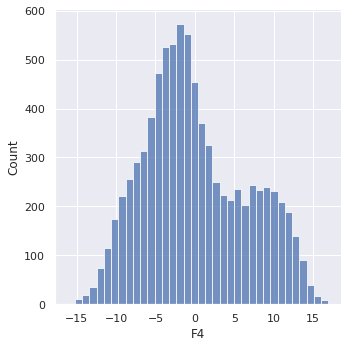

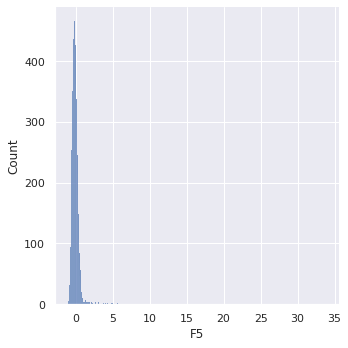

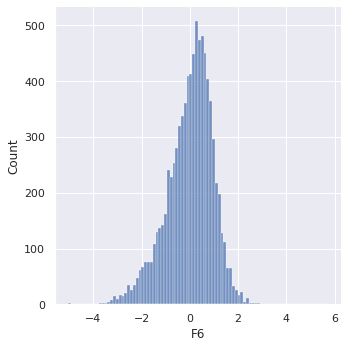

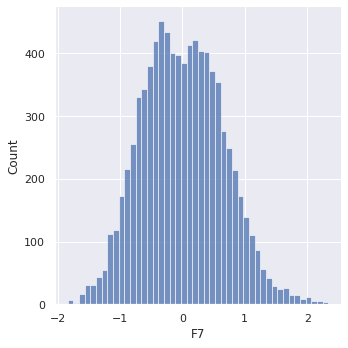

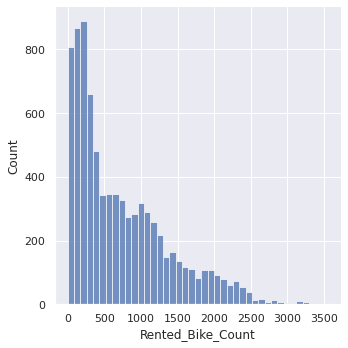

In [ ]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_pca.columns:
    pos = pos + 1
    sns.displot(df_pca[i])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X , Y, test_size=0.20)


print("Shape of Train data set is",X_train.shape,Y_train.shape)
print("Shape of X_test is ",X_test.shape,Y_test.shape)

Shape of Train data set is (6772, 10) (6772,)
Shape of X_test is  (1693, 10) (1693,)


In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-7,1e-3,1e-2,1e-1,1,5,10,20,100]}
regressor = GridSearchCV(lasso, parameters, cv=8)
regressor.fit(X_train, Y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-07, 0.001, 0.01, 0.1, 1, 5, 10, 20, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
optimal=regressor.best_estimator_

In [ ]:
y_pred=optimal.predict(X_test)
y_pred_train=optimal.predict(X_train)

In [ ]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 183090.31419862105
RMSE : 427.8905399732752


In [ ]:
#Train datset
r2 = r2_score(Y_train, y_pred_train)
print("R2 :" ,r2)

R2 : 0.5123144306744638


In [ ]:
#test dataset
r2 = r2_score(Y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.5239293435984727


### **XGboost algorithm**

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {
            'eta': [0.001], 
            'colsample_bytree':[0.9, 1], 
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
          
          }

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[09:19:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:19:33] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.9, 1], 'eta': [0.001],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()


{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.001}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

In [ ]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [ ]:
reg_optimal_model.score(X_test,y_test)

0.9393957200655451

In [ ]:
##For Train dataset:

#Find R-squared value
r2 = r2_score(y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
r2

0.9393957200655451

In [ ]:
adj_r2

0.9390354092454829

In [ ]:
MSE  = mean_squared_error(y_test, test_preds)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(y_test, test_preds)
print("MAE :" , MAE)


MSE : 23792.413807482197
RMSE : 154.24789725465368
MAE : 101.58015666962797


### **Data Exploration Conclusion:**

* Temperature: People generally prefer to bike at moderate to high temperatures. We see highest rental counts between 20 to 32 degree Celsius.
* Humidity: With increasing humidity, we see decrease in the number of bike rental count.
* Hour: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a no holiday and is mostly uniform during the day on a non-holiday.
* Temperature, Windspeed, Visibility, Solar radiation: They have a positive correlation with bike rents.
* Rainfall, Snowfall: They have a negative correlation with bike rents.
* Seasons: We see highest number bike rentals in Summer and the lowest in Winter season.

**Modeling Conclusions:**
* We use 5 Regression Models to predict the hourly rented bike count - Linear Regression, Lasso, Ridge, Decision Tree, Random Forest.
* Among all the 5 models, Random Forest Model has the best metric analysis.
* Lasso or Ridge regularisation did not provide any improvement to the regular linear regression.